In [1]:
!pwd

/usr/src/app


In [2]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0 _CudaDeviceProperties(name='NVIDIA Tegra X1', major=5, minor=3, total_memory=3964MB, multi_processor_count=1)


In [4]:
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vaBgQYwyCHD76EUqgXOv")
project = rf.workspace("karel-cornelis-q2qqg").project("aicook-lcv4d")
dataset = project.version(4).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
%cat {dataset.location}/data.yaml

names:
- apple
- banana
- beef
- blueberries
- bread
- butter
- carrot
- cheese
- chicken
- chicken_breast
- chocolate
- corn
- eggs
- flour
- goat_cheese
- green_beans
- ground_beef
- ham
- heavy_cream
- lime
- milk
- mushrooms
- onion
- potato
- shrimp
- spinach
- strawberries
- sugar
- sweet_potato
- tomato
nc: 30
train: aicook-4/train/images
val: aicook-4/valid/images


In [7]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
%cat /workspace/w251finalyolo5/models/yolov5s.yaml


# parameters
nc: 30  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[

In [9]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [10]:
%%writetemplate /workspace/w251finalyolo5/models/yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [11]:
%%time
!python train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache

[Errno 2] No such file or directory: '/workspace/repos/yolov5'
/workspace/w251finalyolo5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/workspace/w251finalyolo5/aicook-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.8.13 torch-1.13.0a0+340c412 CUDA:0 (Tesla T4, 14910MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005

      0/99     1.79G    0.1142   0.09476   0.08514       348       416:   2%|▏  Exception in thread Thread-28:
Traceback (most recent call last):
  File "/workspace/w251finalyolo5/utils/plots.py", line 57, in check_pil_font
    return ImageFont.truetype(str(font) if font.exists() else font.name, size)
  File "/opt/conda/lib/python3.8/site-packages/PIL/ImageFont.py", line 844, in truetype
    return freetype(font)
  File "/opt/conda/lib/python3.8/site-packages/PIL/ImageFont.py", line 841, in freetype
    return FreeTypeFont(font, size, index, encoding, layout_engine)
  File "/opt/conda/lib/python3.8/site-packages/PIL/ImageFont.py", line 169, in __init__
    if core.HAVE_RAQM:
  File "/opt/conda/lib/python3.8/site-packages/PIL/ImageFont.py", line 43, in __getattr__
    raise ImportError("The _imagingft C module is not installed")
ImportError: The _imagingft C module is not installed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     19/99     2.19G   0.03844   0.05841   0.02083       280       416: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        103       1227      0.854       0.89      0.914      0.532

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     20/99     2.19G   0.03689   0.05758   0.01966       232       416: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        103       1227      0.909      0.888      0.927      0.528

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     21/99     2.19G   0.03667   0.05668   0.01857       424       416: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        103       1227      0.914      0.889      0.925       0.52

     Epoch   gpu_mem       box      

In [12]:
!ls runs

CONTRIBUTING.md  __pycache__  export.py		runs		utils
LICENSE		 aicook-4     hubconf.py	setup.cfg	val.py
README.md	 data	      models		train.py	yolov5s.pt
Testrun.ipynb	 detect.py    requirements.txt	tutorial.ipynb


In [13]:
!python export.py --weights 'runs/train/yolov5s_results/weights/best.pt' --include onnx

export: data=data/coco128.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.8.13 torch-1.13.0a0+340c412 CPU

Fusing layers... 
YOLOv5s summary: 232 layers, 7324731 parameters, 0 gradients, 17.0 GFLOPs

PyTorch: starting from runs/train/yolov5s_results/weights/best.pt with output shape (1, 25200, 35) (56.6 MB)

ONNX: starting export with onnx 1.11.0...
ONNX: export success, saved as runs/train/yolov5s_results/weights/best.onnx (28.4 MB)

Export complete (3.51s)
Results saved to /workspace/w251finalyolo5/runs/train/yolov5s_results/weights
Detect:          python detect.py --weights runs/train/yolov5s_results/weights/best.onnx 
Validate: 

In [2]:
import torch 
import cv2

In [3]:
!pwd

/usr/src/app


In [4]:
model = torch.hub.load('/usr/src/app', 'custom', path='runs/train/yolov5s_results/weights/last.pt', source='local')

YOLOv5 🚀 v6.1-305-g222a52c6 Python-3.6.9 torch-1.9.0 CUDA:0 (NVIDIA Tegra X1, 3964MiB)



Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed


Fusing layers... 
YOLOv5s summary: 232 layers, 7324731 parameters, 0 gradients, 17.0 GFLOPs
Adding AutoShape... 


In [93]:
model.conf = .5

In [83]:
[i for i in range(30)]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [97]:
model.classes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,
29]

In [6]:
im2 = cv2.imread('aicook-4/test/images/DSC_5941_JPG_jpg.rf.7f34ef03affd2f952f6519e8506d8cdc.jpg')[..., ::-1]

In [7]:
im2.shape

(640, 640, 3)

In [86]:
results = model(im2, size=640)

In [85]:
results

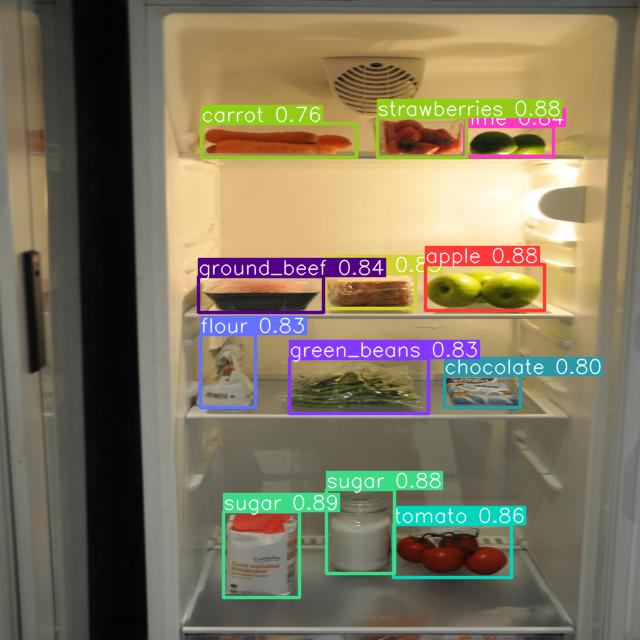

In [87]:
results.show()

In [11]:
results.print()

image 1/1: 640x640 1 apple, 1 bread, 1 carrot, 1 chocolate, 1 flour, 1 green_beans, 1 ground_beef, 1 lime, 1 strawberries, 2 sugars, 1 tomato
Speed: 252.4ms pre-process, 520.0ms inference, 146.6ms NMS per image at shape (1, 3, 640, 640)


In [70]:
cap = cv2.VideoCapture(0)

In [67]:
ret, frame = cap.read()

In [68]:
test = frame[..., ::-1]

In [69]:
test.shape

(480, 640, 3)

In [31]:
cv2.imwrite('test.jpg',frame)

True

In [98]:
results = model(test, size=640)

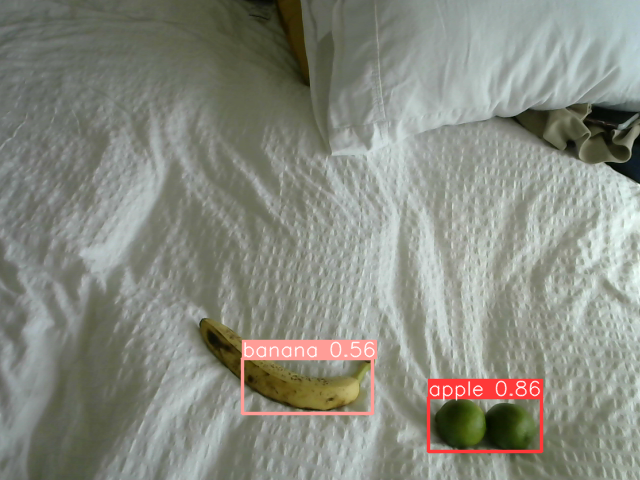

In [99]:
results.show()

In [43]:
!python3 detect.py --source test.jpg --weights 'runs/train/yolov5s_results/weights/last.pt' --img 640 --conf 0.4 --

detect: weights=['runs/train/yolov5s_results/weights/last.pt'], source=test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
YOLOv5 \U0001f680 v6.1-305-g222a52c6 Python-3.6.9 torch-1.9.0 CUDA:0 (NVIDIA Tegra X1, 3964MiB)

Fusing layers... 
YOLOv5s summary: 232 layers, 7324731 parameters, 0 gradients, 17.0 GFLOPs
image 1/1 /usr/src/app/test.jpg: 480x640 1 apple, 1 banana, 1 milk, 15 spinachs, Done. (0.153s)
Speed: 141.0ms pre-process, 152.6ms inference, 158.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7
